In [25]:
import os
import pandas as pd

path = "/Users/saramcghee/.cache/kagglehub/datasets/fleanend/birds-songs-numeric-dataset/versions/3"

train_df = pd.read_csv(os.path.join(path, "train.csv"))
test_df = pd.read_csv(os.path.join(path, "test.csv"))

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Define label and drop columns we don't want as features
label_col = "species"
drop_cols = ["id", "genus", label_col]

X_train = train_df.drop(columns=drop_cols)
y_train = train_df[label_col]

X_test = test_df.drop(columns=drop_cols)
y_test = test_df[label_col]

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

train_df.head()


Train shape: (1760, 172)
Test shape: (16626, 172)
X_train: (1760, 169) y_train: (1760,)
X_test: (16626, 169) y_test: (16626,)


,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species
0,0,0.997944,0.832392,0.765386,0.704275,0.655724,0.331064,0.927524,0.307601,0.492226,...,2507.041444,2730.515996,2609.940118,2703.391485,2676.400501,2818.375970,2706.119792,2740.820762,2684.624946,flammea
1,1,0.996255,0.839120,0.760417,0.705142,0.662990,0.329859,0.924461,0.300951,0.493679,...,2490.339399,2730.212864,2609.668564,2703.721292,2676.695013,2818.554958,2705.497472,2741.509333,2683.727859,flammea
2,2,0.970810,0.823540,0.759508,0.709058,0.659750,0.336233,0.933035,0.301501,0.491263,...,2497.486714,2729.438087,2609.010529,2704.515718,2677.465965,2818.971388,2703.952638,2743.213960,2681.482884,flammea
3,3,1.000000,0.855558,0.752038,0.710977,0.664579,0.334564,0.928026,0.292012,0.493557,...,2503.217602,2728.961249,2608.631818,2704.971676,2677.953716,2819.200288,2703.033515,2744.224849,2680.133570,flammea
4,4,1.000000,0.884305,0.741885,0.714775,0.672465,0.329072,0.912804,0.279094,0.501200,...,2523.364512,2728.800252,2608.508516,2705.120155,2678.118949,2819.273155,2702.728487,2744.559785,2679.683390,flammea


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Baseline accuracy:", accuracy_score(y_test, y_pred))



Baseline accuracy: 0.9781667268134248


In [27]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X_train = train_df.drop(columns=["species", "id"])
y_train = train_df["species"]

X_test = test_df.drop(columns=["species", "id"])
y_test = test_df["species"]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)


X_train: (1760, 170)
y_train: (1760,)


In [28]:
X_train_num = X_train.drop(columns=["genus"])
X_test_num  = X_test.drop(columns=["genus"])

print(X_train_num.shape, X_test_num.shape)


(1760, 169) (16626, 169)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=2000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Baseline accuracy:", accuracy_score(y_test, y_pred))


Baseline accuracy: 0.9781667268134248


<Figure size 1400x1400 with 0 Axes>

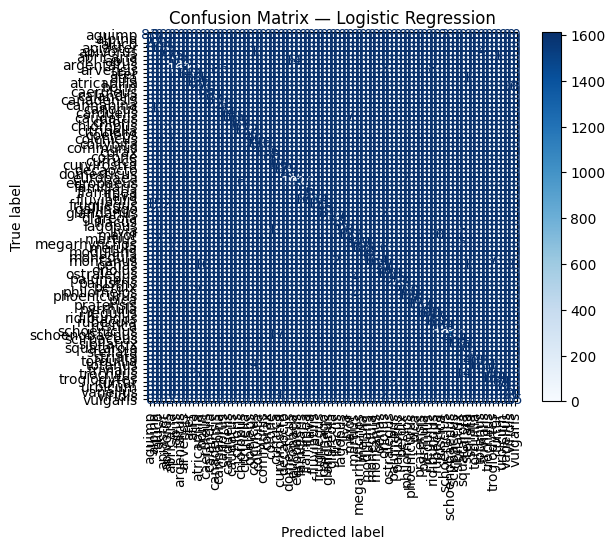

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(14, 14))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=90, cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()


In [34]:
sorted(y_train.unique())[:10]


['aguimp',
 'alpina',
 'aluco',
 'apiaster',
 'apivorus',
 'apricaria',
 'apus',
 'argentatus',
 'arvensis',
 'ater']

In [37]:
import joblib

# IMPORTANT: recompute feature columns exactly how the model was trained
audio_feature_columns = train_df.drop(
    columns=["id", "genus", "species"]
).columns.tolist()

joblib.dump(model, "audio_model.joblib")
joblib.dump(scaler, "audio_scaler.joblib")
joblib.dump(audio_feature_columns, "audio_feature_columns.joblib")
joblib.dump(model.classes_.tolist(), "audio_classes.joblib")

print("✅ Audio artifacts saved cleanly")
print("Num features:", len(audio_feature_columns))


✅ Audio artifacts saved cleanly
Num features: 169
